In [1]:
import pandas as pd
import networkx as nx
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import pprint
from networkx.readwrite import json_graph

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/umassdgithub/Week-8-part-1/main/data/data_scopus.csv")
df= df[~pd.isnull(df['Authors with affiliations'])].copy()

In [3]:
def get_first_author_affilation(x):
  try:
    return x.split(";")[0].split(",")[-1].strip()
  except Exception as ex:
    print(x)
df['First_author_Country']=df['Authors with affiliations'].apply(get_first_author_affilation)

In [4]:
df['First_author_Country']

0             Canada
1              Italy
2             Serbia
3              Japan
4              India
           ...      
565           Canada
566    United States
567      South Korea
568    United States
569           Canada
Name: First_author_Country, Length: 561, dtype: object

In [5]:
df["Source title"].value_counts().reset_index()

,index,Source title
0,Proc. of the IADIS Int. Conf. Computer Graphic...,55
1,MCCSIS 2018 - Multi Conference on Computer Sci...,53
2,Proceedings of the International Conferences o...,49
3,Proceedings of the IEEE Visualization Conference,48
4,Proceedings of the IEEE Symposium on Informati...,41
5,Lecture Notes in Artificial Intelligence (Subs...,35
6,International Multidisciplinary Scientific Geo...,32
7,Proceedings of the ACM Symposium on Applied Co...,32
8,International Journal of Human Computer Studies,29
9,IS and T International Symposium on Electronic...,25


In [6]:
nodes = df['EID'].values
df = df.fillna(0)

In [7]:
G = nx.Graph()

In [8]:
nodes = []
for row in df.iterrows():
  nodes.append((row[1]['EID'],{
      "Title": row[1]['Title'],
      "Year" : row[1]['Year'],
      "Citations" : row[1]['Cited by'],
      "Publisher" : row[1]['Publisher'],
      "Country" : row[1]['First_author_Country']
  }))

In [9]:
G.add_nodes_from(nodes)

In [10]:
edges = []
for row in df.iterrows():
  current_paper = row[1]['EID']
  if ";" in row[1]['Author(s) ID']: 
    authors = row[1]['Author(s) ID'][:-1].split(";")
    for author in authors:
      papers = df[df['Author(s) ID'].str.contains(author)]['EID'].values
      if len(papers)>0:
        for paper in papers:
          if paper != current_paper:
            edges.append((current_paper,paper))
  else:
    continue

In [11]:
G.add_edges_from(edges)

In [12]:
pos = nx.spring_layout(G)

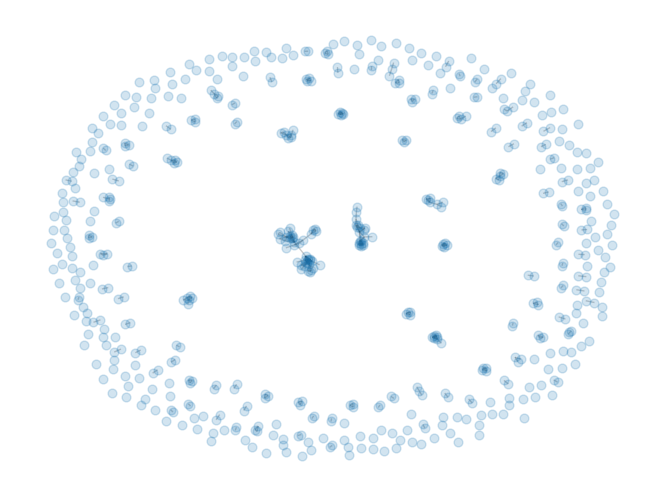

In [13]:
nx.draw(G,pos=pos, node_size=40,alpha=.2)

In [14]:
with open("publication.json",'w') as f:
  json.dump(json_graph.node_link_data(G),f)

In [15]:
nx.write_gml(G,"network.gml")